<a href="https://colab.research.google.com/github/1218muskan/MLnow_2.0/blob/main/Univariate_Linear_Regression_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET: [Students Performance in Exams](https://www.kaggle.com/spscientist/students-performance-in-exams)

**Date Created**: June 10, 2021

# Exploratory Data Analysis (EDA)

In [ ]:
# mounting with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
cd '/content/drive/MyDrive/Learning_ML/EDA'

/content/drive/MyDrive/Learning_ML/EDA


In [23]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import os 

In [24]:
df = pd.read_csv('StudentsPerformance.csv') 

In [25]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Data Processing

categorical to numeric value conversion

In [26]:
print('Gender:',df['gender'].unique())
print('Race:',df['race/ethnicity'].unique())
print('Parent\'s Education:',df['parental level of education'].unique())
print('lunch:',df['lunch'].unique())
print('Preparation course:',df['test preparation course'].unique())

Gender: ['female' 'male']
Race: ['group B' 'group C' 'group A' 'group D' 'group E']
Parent's Education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
Preparation course: ['none' 'completed']


In [27]:
#binary valued

df['gender'] = df['gender'].apply({'female':1, 'male':2}.get)
df['lunch'] = df['lunch'].apply({'standard':1, 'free/reduced':2}.get)
df['test preparation course'] = df['test preparation course'].apply({'none':1, 'completed':2}.get)

#multi-valued

df['race/ethnicity'] = df['race/ethnicity'].apply({'group A':1, 'group B':2, 'group C':3, 'group D':4, 'group E':5}.get)
df['parental level of education'] = df['parental level of education'].apply({'bachelor\'s degree':1, 'some college':2, 'master\'s degree':3, 'associate\'s degree':4, 'high school':5, 'some high school':6}.get)


df.head(15)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,2,1,1,1,72,72,74
1,1,3,2,1,2,69,90,88
2,1,2,3,1,1,90,95,93
3,2,1,4,2,1,47,57,44
4,2,3,2,1,1,76,78,75
5,1,2,4,1,1,71,83,78
6,1,2,2,1,2,88,95,92
7,2,2,2,2,1,40,43,39
8,2,4,5,2,2,64,64,67
9,1,2,5,2,1,38,60,50


In [28]:
df.to_csv('cleanedDataset.csv')

In [29]:
ls

cleanedDataset.csv  Student/  StudentsPerformance.csv


## Data Visualization

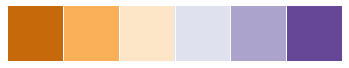

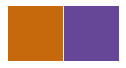

In [39]:
import seaborn as sns

sns.palplot(sns.color_palette('PuOr')) 
# The function palplot() creates a plot for the colors of the palette.

pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors


import matplotlib.pyplot as plt

plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [30]:
print(f''''There are {len(df.columns)} in the dataframe mathData namely,

{df.columns}''')  #columns in the dataframe

'There are 8 in the dataframe mathData namely,

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


### Pair Plot

A pair plot is a plot where the ```x``` 
axis and  ```y``` axis will have all the columns you specify with it

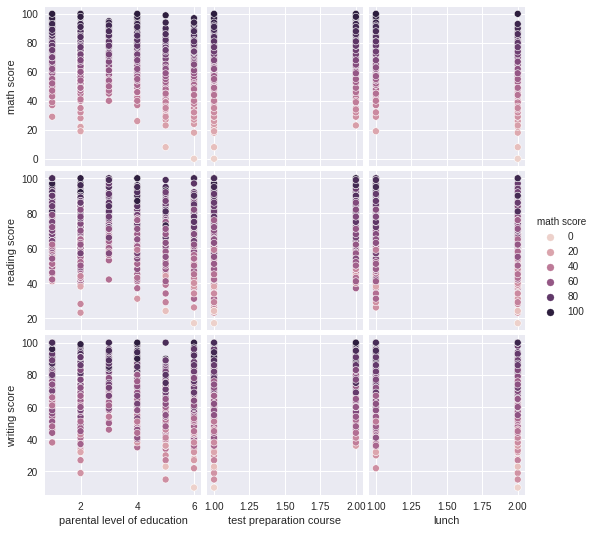

In [40]:
sns.pairplot(df,
             x_vars = [ 'parental level of education','test preparation course','lunch'],
             y_vars = [ 'math score', 'reading score', 'writing score'],
       diag_kind='kde' , hue='math score'
             )

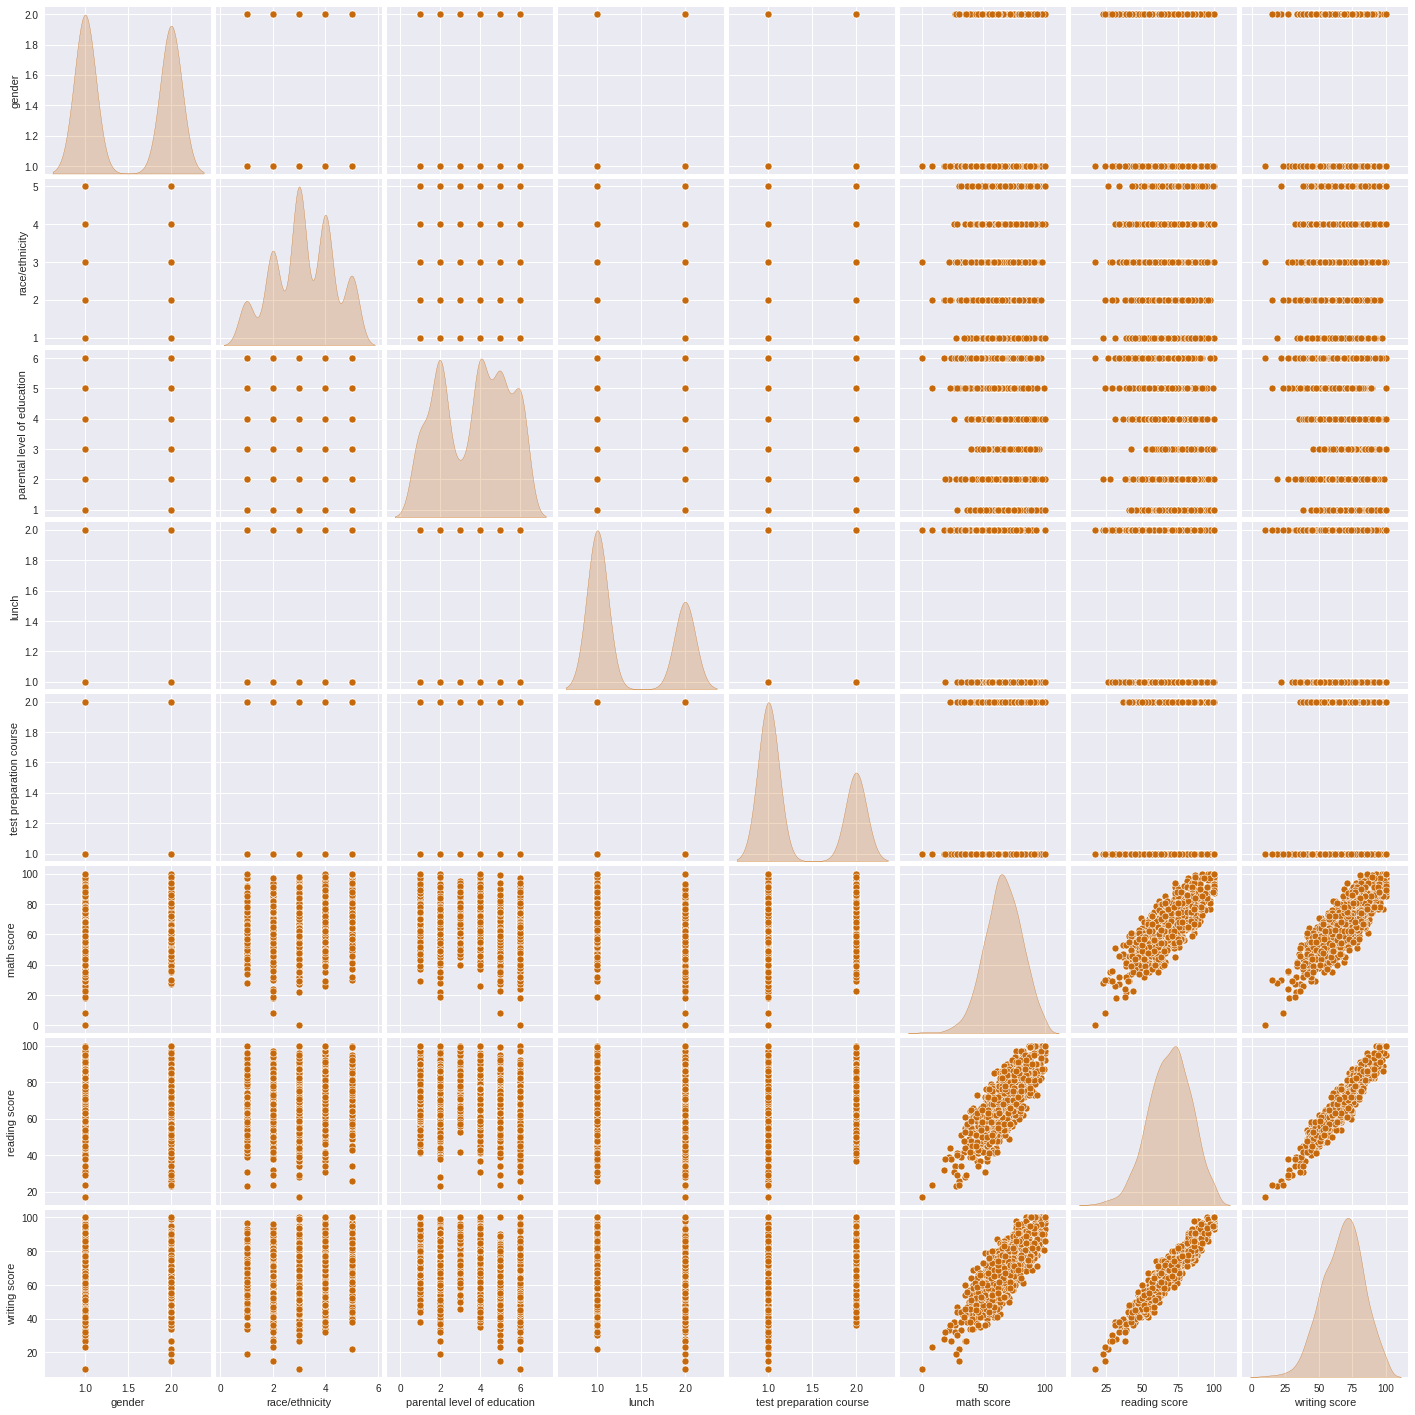

In [41]:
#pairplot for all the values

sns.pairplot(df,
             x_vars = ['gender','race/ethnicity','parental level of education','lunch','test preparation course','math score', 'reading score', 'writing score' ],
             y_vars = ['gender','race/ethnicity','parental level of education','lunch','test preparation course','math score', 'reading score', 'writing score' ],
       diag_kind='kde'
             )

### Strip plot

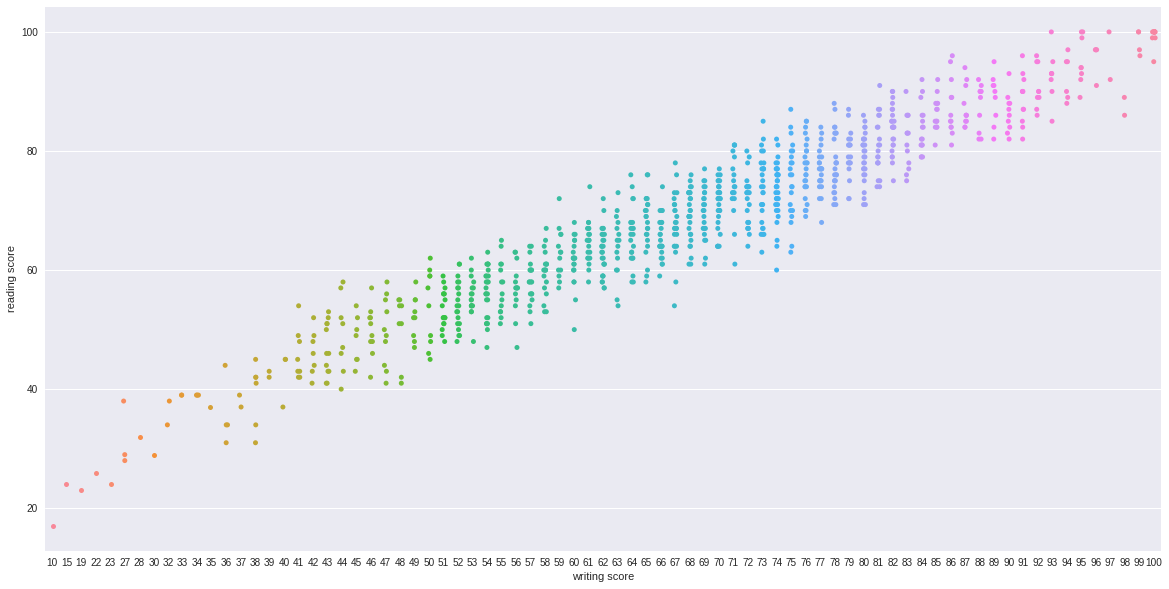

In [55]:
fig = plt.subplots(figsize=(20,10))
sns.stripplot(y='reading score',x='writing score',data=df)

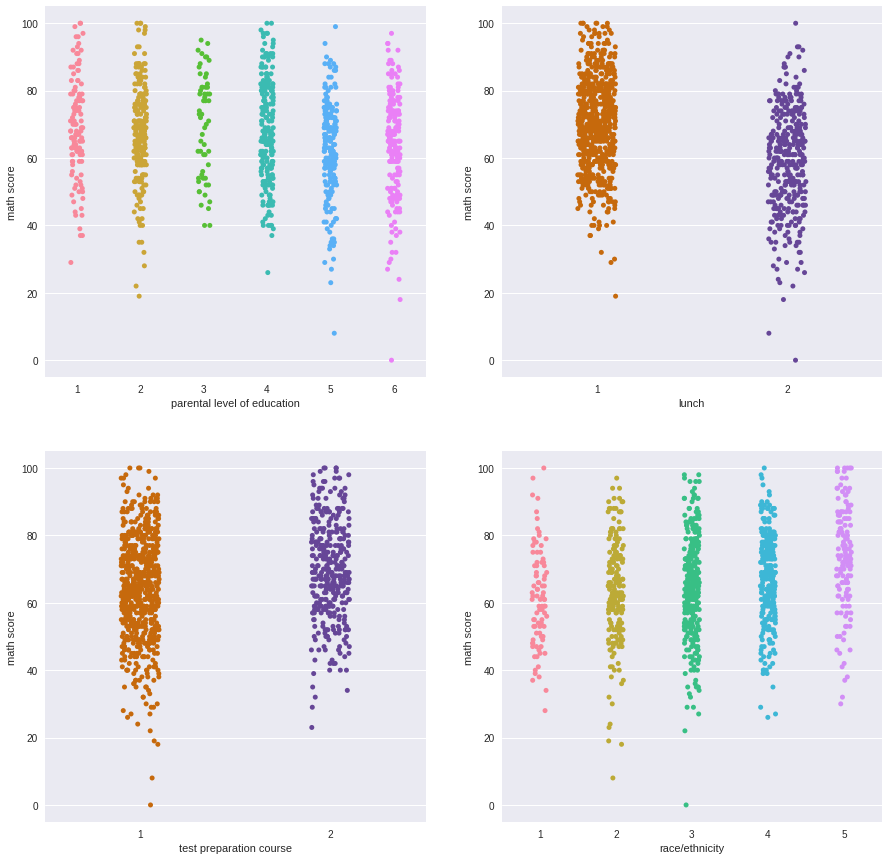

In [69]:
fig, axarr = plt.subplots(2,2, figsize=(15,15))

sns.stripplot(x='parental level of education', y='math score', data=df, hue=None, ax=axarr[0][0])
sns.stripplot(x='lunch', y='math score', data=df, hue=None, ax=axarr[0][1])
sns.stripplot(x='test preparation course', y='math score', data=df, hue=None, ax=axarr[1][0])
sns.stripplot(x='race/ethnicity', y='math score', data=df, hue=None,  ax=axarr[1][1])